<a href="https://colab.research.google.com/github/asadakkay7/Data-Visualization/blob/main/Neural_Network_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


Training Set (32, 32, 3, 73257) (73257, 1)
Test Set (32, 32, 3, 26032) (26032, 1)
Reshaped Training Set (73257, 32, 32, 3) (73257, 1)
Reshaped Test Set (26032, 32, 32, 3) (26032, 1)
Training Set (58605, 32, 32, 3) (58605, 10)
Validation Set (14652, 32, 32, 3) (14652, 10)
Test Set (26032, 32, 32, 3) (26032, 10)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 160,202 (625.79 KB)

 Trainable params: 160,202 (625.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
916/916 ━━━━━━━━━━━━━━━━━━━━ 99s 105ms/step - accuracy: 0.4024 - loss: 1.7170 - val_accuracy: 0.8307 - val_loss: 0.5843
Epoch 2/20
916/916 ━━━━━━━━━━━━━━━━━━━━ 93s 101ms/step - accuracy: 0.8059 - loss: 0.6472 - val_accuracy: 0.8726 - val_loss: 0.4347
Epoch 3/20
916/916 ━━━━━━━━━━━━━━━━━━━━ 142s 102ms/step - accuracy: 0.8491 - loss: 0.5098 - val_accuracy: 0.8791 - val_loss: 0.4166
Epoch 4/20
916/916 ━━━━━━━━━━━━━━━━━━━━ 90s 98ms/step - accuracy: 0.8662 - loss: 0.4592 - val_accuracy: 0.8902 - val_loss: 0.3665
Epoch 5/20
916/916 ━━━━━━━━━━━━━━━━━━━━ 147s 104ms/step - accuracy: 0.8775 - loss: 0.4110 - val_accuracy: 0.8852 - val_loss: 0.3939
Epoch 6/20
916/916 ━━━━━━━━━━━━━━━━━━━━ 137s 99ms/step - accuracy: 0.8881 - loss: 0.3867 - val_accuracy: 0.8983 - val_loss: 0.3444
Epoch 7/20
916/916 ━━━━━━━━━━━━━━━━━━━━ 91s 99ms/step - accuracy: 0.8960 - loss: 0.3553 - val_accuracy: 0.9014 - val_loss: 0.3267
Epoch 8/20
916/916 ━━━━━━━━━━━━━━━━━━━━ 142s 100ms/step - accuracy: 0.8976 - loss: 

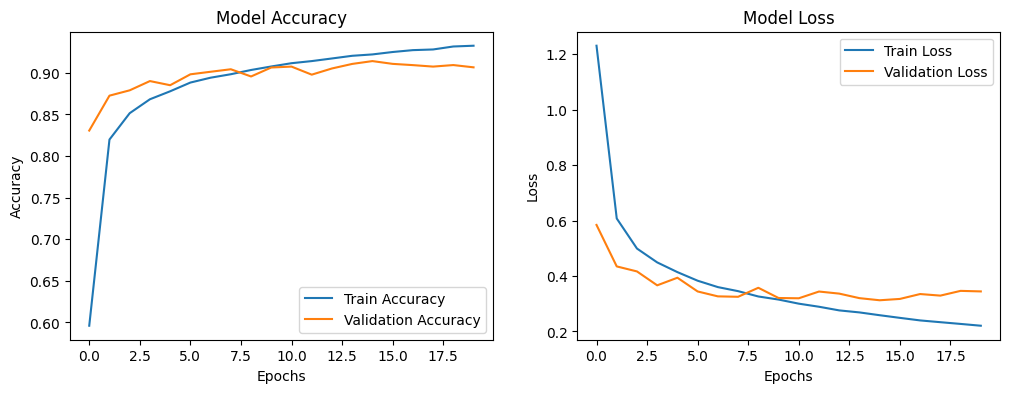

In [39]:
# Install necessary libraries
!pip install mat73

import mat73
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define dataset paths
train_dataset_path = '/content/drive/MyDrive/Colab Notebooks/train_32x32.mat'
test_dataset_path = '/content/drive/MyDrive/Colab Notebooks/test_32x32.mat'

# Load data function
def load_data(path):
    """ Helper function for loading a MAT-File"""
    data = loadmat(path)  # Since the original dataset isn't using mat73 but loadmat
    return data['X'], data['y']

# Load training and test data
X_train, y_train = load_data(train_dataset_path)
X_test, y_test = load_data(test_dataset_path)

# Inspect the shape
print("Training Set", X_train.shape, y_train.shape)
print("Test Set", X_test.shape, y_test.shape)

# Transpose the dataset: (width, height, channels, samples) -> (samples, width, height, channels)
X_train = np.transpose(X_train, (3, 0, 1, 2))
X_test = np.transpose(X_test, (3, 0, 1, 2))

print("Reshaped Training Set", X_train.shape, y_train.shape)
print("Reshaped Test Set", X_test.shape, y_test.shape)

# Normalize the image data (from 0-255 to 0-1)
X_train = X_train.astype('float32')/ 255.0
X_test = X_test.astype('float32')/ 255.0

# Handle label 10 (which represents '0') as 0 for classification
y_train[y_train == 10] = 0
y_test[y_test == 10] = 0

# Convert the labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print("Training Set", X_train.shape, y_train.shape)
print("Validation Set", X_val.shape, y_val.shape)
print("Test Set", X_test.shape, y_test.shape)

### Building the CNN Model
def build_model():
    model = Sequential()

    # First convolution layer
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Second convolution layer
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Third convolution layer
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten the output
    model.add(Flatten())

    # Fully connected layer
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))

    # Output layer (10 digits, softmax activation for classification)
    model.add(Dense(10, activation='softmax'))

    # Compile the model
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Build the model
model = build_model()

# Print model summary
model.summary()

### Training the Model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val))

### Evaluating the Model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc * 100:.2f}%')

### Plotting Training History
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


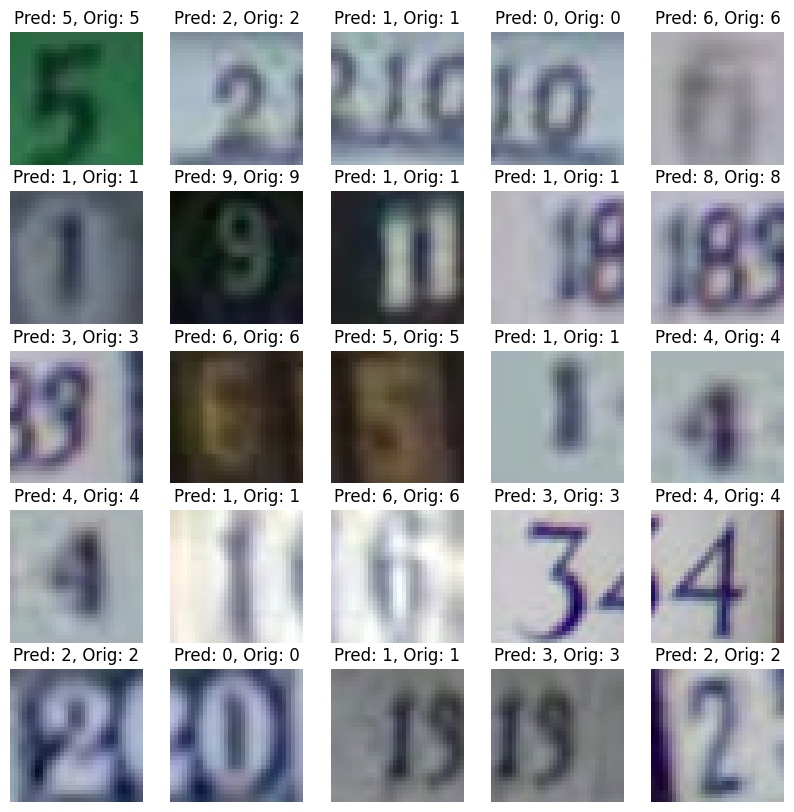

In [41]:
# prompt: WRITE CODE TO SHOW PICTURE WITH PREDICTED AND ORIGBAL

def pred_plot_with_original(model, x_test, y_test):
  """
  Predicts the class of the input image and plots it with the predicted class and the original label.

  Args:
    model: The trained CNN model.
    x_test: The input image data.
    y_test: The original labels of the images.
  """
  y_pred = model.predict(x_test)
  y_pred_classes = np.argmax(y_pred, axis=1)
  y_test_classes = np.argmax(y_test, axis=1)

  # Plot the image and predicted class
  plt.figure(figsize=(10, 10))
  for i in range(25):  # Display the first 25 images
      plt.subplot(5, 5, i + 1)
      plt.imshow(x_test[i])
      plt.title(f"Pred: {y_pred_classes[i]}, Orig: {y_test_classes[i]}")
      plt.axis('off')
  plt.show()

# Example usage (assuming you have your model, X_test, and y_test ready)
pred_plot_with_original(model, X_test[:25],y_test[:25])